# Second Order Models

A standard form for a generic second-order model for a stable linear system is given  by

$$\tau^2\frac{d^2y}{dt^2} + 2\zeta\tau\frac{dy}{dt} + y = K u$$

where $y$ and $u$ are **deviation variables**.  The parameters have a generic interpretation that are commonly used to describe the qualitative characteristics of these systems.

| Parameter | Units | Description |
| :-: | :-: | :-: |
| $K$ | $\frac{\mbox{units of } y}{\mbox{units of }u}$ | Steady State Gain |
| $\tau \gt 0$ | time | Time Constant |
| $\zeta \geq 0$ | dimensionless | Damping Factor |

The standard form assumes that a zero input (i.e, $u(t) = 0$) results in a zero response ($y(t) = 0$). In practice, the nominal or quiescent value of $y$ or $u$ may different from zero. In that case we would write

$$\tau^2\frac{d^2y}{dt^2} + 2\zeta\tau\frac{dy}{dt} + y - y_{ref} = K\left(u(t) - u_{ref}\right)$$

where $u_{ref}$ and $y_{ref}$ represent constant reference values.

## Step Response

The step response corresponds to a system that is initially at steady-state where $u = u_{ref}$ and $y = y_{ref}$.  At time $t=0$ the input is incremented by a constant value U, i.e. $u = u_{ref} + U$ for $t \geq 0$.  The subsequent response $y(t) - y_{ref}$ is the **step response**.

Second order linear systems have elegant analytical solutions expressed using exponential and trignometric functions. There are four distinct cases that depend on the value of the damping factor $\zeta$:

* Overdamped
* Critically damped
* Underdamped
* Undamped Oscillations

### Overdamped ($\zeta > 1$)

An overdamped response tends to be sluggish, and with a potentially a large difference in time scales $\tau_1$ and $\tau_2$. The geometric mean of $\tau_1$ and $\tau_2$ is $\tau$.  The value of $\zeta$ determines the differences.

$$y(t) = y_{ref} + KU\left(1 - \frac{\tau_1e^{-t/\tau_1} - \tau_2e^{-t/\tau_2}}{\tau_1 - \tau_2}\right)$$

where $\tau_1$ and $\tau_2$ are found by factor the polynomial

$$\tau^2s^2 + 2\zeta\tau s + 1 = (\tau_1s + 1)(\tau_2s + 1)$$

For $\zeta \geq 1$ the solutions are given by

\begin{align}
\tau_1 & = \frac{\tau}{\zeta - \sqrt{\zeta^2-1}} \\
\tau_2 & = \frac{\tau}{\zeta + \sqrt{\zeta^2-1}}
\end{align}



In [132]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [134]:
def overdamped(K, tau, zeta):
    t = np.linspace(0,20)
    tau_1 = tau/(zeta - np.sqrt(zeta**2 - 1))
    tau_2 = tau/(zeta + np.sqrt(zeta**2 - 1))

    y = K*(1 - ((tau_1*np.exp(-t/tau_1) - tau_2*np.exp(-t/tau_2))/(tau_1 - tau_2)))
    plt.plot(t,y)
    plt.grid()
    
interact(overdamped, K=(0.5,2), tau=(0.5,2), zeta=(1.01,2));

A Jupyter Widget

### Critically Damped ($\zeta = 1$)

$$y(t) = y_{ref} + KU\left[1 - \left(1 + \frac{t}{\tau}\right)e^{-t/\tau}\right]$$

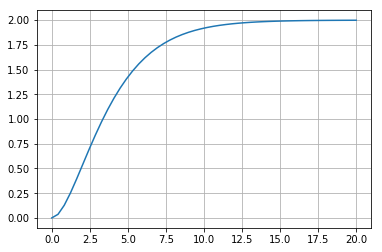

In [135]:
def criticallydamped(K, tau):
    t = np.linspace(0,20)
    y = K*(1 - (1 + t/tau)*np.exp(-t/tau))
    plt.plot(t,y)
    plt.grid()
    
criticallydamped(K=2, tau=2)

### Underdamped ($0 \lt \zeta \lt 1$)

One version of the solution can be written

$$y(t) = y_{ref} + KU\left(1 - e^{-\zeta t/\tau}\left[\cos\left(\frac{\sqrt{1-\zeta^2}}{\tau}t\right) + \frac{\zeta}{\sqrt{1-\zeta^2}}\sin\left(\frac{\sqrt{1-\zeta^2}}{\tau}t\right)\right] \right)$$

This can be expressed a bit more compactly by introducing a frequency

$$\omega = \frac{\sqrt{1-\zeta^2}}{\tau}$$

which results in

$$y(t) = y_{ref} + KU\left[1 - e^{-\zeta t/\tau}\left(\cos\left(\omega t\right) + \frac{\zeta}{\sqrt{1-\zeta^2}}\,\sin\left(\omega t\right) \right)\right]$$


In [125]:
def underdamped(K, tau, zeta):
    t = np.linspace(0,20)
    c = np.cos(np.sqrt(1-zeta**2)*t/tau)
    s = np.sin(np.sqrt(1-zeta**2)*t/tau)
    
    y = K*(1 - np.exp(-zeta*t/tau)*(c + zeta*s/np.sqrt(1-zeta**2)))
    plt.plot(t,y)
    plt.grid()
    
interact(underdamped, K=(0.5,3), tau=(0.5,3), zeta=(0,0.999))

A Jupyter Widget

<function __main__.underdamped>

### Undamped ($\zeta = 0$)

Finally, there is the special case of an undamped oscillation

$$y(t) = y_{ref} + KU\left[1 - \cos\left(\omega t\right) \right]$$

where $\omega = 1/\tau$.

## Simulation

A second-order differential equation can be simulated as a system of two first order differential equations. The key is to introduce a new variable $v = \frac{dy}{dt}$. 

$$\begin{align*}
\frac{dy}{dt} & = v \\
\frac{dv}{dt} & = -\frac{1}{\tau^2}(y-y_{ref}) - \frac{2\zeta}{\tau}v + K\left(u(t)-u_{ref}\right)
\end{align*}$$

In [136]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

def simulation(yref=0, U=1, K=1, tau=1, zeta=0.2):

    def deriv(X,t):
        y,v = X
        ydot = v
        vdot = -(y-yref)/tau/tau - 2*zeta*v/tau + K*U/tau/tau
        return[ydot,vdot]

    # simulation  
    t = np.linspace(0,20*tau,1000)
    y = odeint(deriv, [yref,0], t)[:,0]
    
    # plot steady state line and bounds
    plt.figure(figsize=(12,6))

    
    # plot solution
    plt.plot(t,y,lw=3)
    plt.title('Step Response of a Second Order System')
    plt.xlabel('Time')
    plt.ylabel('y')
    
    # plot limits
    plt.ylim(plt.ylim()[0],1.1*plt.ylim()[1])
    plt.xlim(t[0],t[-1])
    dy = np.diff(plt.ylim())
    
    # arrow props
    ap1 = dict(arrowstyle="->")
    ap2 = dict(arrowstyle="<->")

    if zeta < 1:
        #overshoot
        os = np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))
        
        # time to first peak
        tp = np.pi*tau/np.sqrt(1-zeta**2)
        yp = (1+os)*K*U + yref
          
        plt.text(tp,yp+0.02*dy,"Overshoot\n b/a = {0:0.2f}".format(os), ha='center')
        plt.annotate('',xy=(tp,K*U+yref),xytext=(tp,yp),arrowprops=ap2)
        plt.text(tp,(K*U+yref+yp)/2,' b')
        plt.annotate('',xy=(tp,yref),xytext=(tp,K*U+yref),arrowprops=ap2)
        plt.text(tp,K*U/2+yref,' a')
        plt.annotate("Time to first\n peak = {0:.2f}".format(tp),
                    xy=(tp,yref), xytext=(1.2*tp,0.2*K*U+yref),arrowprops=ap1)

        # rise time
        tr = t[np.where(np.diff(np.sign(y-yref-K*U))*np.sign(K*U)>0)[0][0]]
        if tr < plt.xlim()[1]:
            plt.plot([tr,tr],[0.3*K*U+yref,K*U+yref],'r:')
            plt.annotate('',xy=(plt.xlim()[0],0.4*K*U+yref),xytext=(tr,0.4*K*U+yref),
                         arrowprops=ap2)
            plt.text(plt.xlim()[0]+tr/2,0.42*K*U+yref+0.02*dy,
                    'Rise Time\n = {0:.2f}'.format(tr),ha='center')
        
        # period
        P = 2*np.pi*tau/np.sqrt(1-zeta**2)
        if tr + P < plt.xlim()[1]:
            plt.plot([tr,tr],[0.3*K*U+yref,K*U+yref],'r:')
            plt.plot([tr+P,tr+P],[0.3*K*U+yref,K*U+yref],'r:')
            plt.annotate('',xy=(tr,0.4*K*U+yref),xytext=(tr+P,0.4*K*U+yref),arrowprops=ap2)
            plt.text(tr+P/2,0.42*K*U+yref+0.02*dy,'Period = {0:.2f}'.format(P), ha='center')
        
        # second peak
        if tp + P < plt.xlim()[1]:
            plt.annotate('',xy=(tp+P,K*U+yref),xytext=(tp+P,K*U*(1+os**3)+yref),
                        arrowprops=ap2)
            plt.text(tp+P,K*U*(1+os**3/2)+yref,' c')
            plt.text(tp+P,K*U*(1+os**3)+yref+0.02*dy,
                    'Decay Ratio\n c/b = {0:.2f}'.format(os**2),va='bottom',ha='center')
        
        # settling time
        ts = -np.log(0.05)*np.sqrt(1-zeta**2)*tau/zeta
        if ts < plt.xlim()[1]:
            plt.fill_between(t[t>ts],0.95*K*U+yref,1.05*K*U+yref,alpha=0.4,color='y')
            plt.text(ts,1.05*K*U+yref+0.02*dy,
                     'Settling Time\n = {0:.2f}'.format(ts),ha='center')

            
    plt.plot(plt.xlim(),[yref,yref],'k--')
    plt.plot(plt.xlim(),[K*U+yref,K*U+yref],'k--')
    
interact(simulation, yref = (-10,10,0.1), U=(0.01,5,0.01), 
         K = (-5,5,0.01), zeta=(0.01,3,0.01), tau = (0.1,5.0,0.01));

A Jupyter Widget

## Performance Indicators for Underdamped Systems 

For an underdamped second order system, the desired performance metrics are given by the following by formulas in the following table.

| Quantity           | Symbol | Expression/Value                                       |
| :----------------: | :----: | :----------------------------------------------------: |
| Rise Time          | $t_r$  | Time to first SS crossing                              |
| Time to first peak | $t_p$  | $\frac{\pi\tau}{\sqrt{1-\zeta^2}}$                     |
| Overshoot          | OS     | $\exp\left(-\frac{\pi\zeta}{\sqrt{1-\zeta^2}}\right)$  |
| Decay Ratio        | DR     | $\exp\left(-\frac{2\pi\zeta}{\sqrt{1-\zeta^2}}\right)$ |
| Period             |        | $\frac{2\pi\tau}{\sqrt{1-\zeta^2}}$                    |
| Setting Time       | $t_s$  | Time to +/- 5% of SS                                   |

## Estimating Parameters for an Underdamped System

### Starting with a Physical Model

A dynamical model for a u-tube manometer is given by

$$\frac{d^2h'}{dt^2} + \frac{6\mu}{R^2\rho}\frac{dh'}{dt} + \frac{3}{2}\frac{g}{L} h' = \frac{3}{4\rho L} p'(t)$$

where $h'$ is the liquid level displacement from an equilibrium position due to a pressure difference $p'(t)$.

| Parameter | Symbol |
| :-: | :-: |
| radius | $R$ |
| liquid length | $L$ |
| gravity | $g$ |
| density | $\rho$ |
| viscosity | $\mu$ |

What is the gain $K$? Time constant $\tau$?  Damping factor $\zeta$? How would choose the radius for the fastest response without overshoot?

### Starting with a Step Response

Underdamped systems have clearly identifiable and measureable characteristics that can be used to identify parameters $K$, $\tau$, and $\zeta$. One procedure, for example, is to execute a step response experiment. Then,

1. Measure overshoot, then estimate damping factor $\zeta$ using a chart of of this equation (or by directly solving the equation for $\zeta$):
$$OS = \frac{a}{b} = \exp\left(\frac{-\pi\zeta}{\sqrt{1-\zeta^2}}\right)$$
2. Measure time-to-first-peak $t_p$. Given $t_p$ and $\zeta$, solve for
$$\tau = \frac{t_p}{\pi}\sqrt{1 - \zeta^2}$$
Alternatively, given period $P$,
$$\tau = \frac{P}{2\pi}\sqrt{1 - \zeta^2}$$


![](2ndOrder.png)

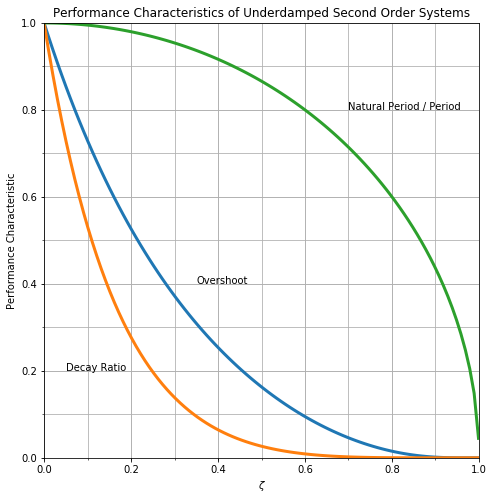

In [139]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

zeta = np.linspace(0,0.999,100)
os = np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))
dr = np.exp(-2*np.pi*zeta/np.sqrt(1-zeta**2))
pd = np.sqrt(1-zeta**2)

plt.figure(figsize=(8,8))
plt.plot(zeta, os, lw=3)
plt.plot(zeta, dr, lw=3)
plt.plot(zeta, pd, lw=3)
plt.axis('square')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Performance Characteristics of Underdamped Second Order Systems')
plt.xlabel('$\zeta$')
plt.ylabel('Performance Characteristic')
plt.text(0.35, 0.4, 'Overshoot')
plt.text(0.05, 0.2, 'Decay Ratio')
plt.text(0.70, 0.8, 'Natural Period / Period')
plt.gca().set_xticks(np.arange(0,1,0.1), minor=True)
plt.gca().set_yticks(np.arange(0,1,0.1), minor=True)
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
